In [1]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'visionapi-295811-6a8bc765fdb3.json'

In [2]:
def detect_faces(path):
    """Detects faces in an image."""
    from google.cloud import vision
    import io
    from matplotlib import pyplot as plt 
    
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations
    
    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')
    
    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))
        print('sorrow: {}'.format(likelihood_name[face.sorrow_likelihood]))


        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        
        print('face bounds: {}'.format(','.join(vertices)))
#         print(vertices)
        
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    print(vertices[1])
    

In [3]:
import io
import os
import cv2 as cv

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = os.path.abspath('faces.jpg')

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

# response = client.face_detection(image=image)

response = detect_faces(file_name) #call function

# faceAnnotations = response.face_detection

# print(len(response.faceAnnotations))

# print('Labels:')
# for label in labels:
#     print(label.description)


Faces:
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (356,345),(494,345),(494,505),(356,505)
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (362,169),(506,169),(506,336),(362,336)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (190,0),(331,0),(331,159),(190,159)
anger: VERY_UNLIKELY
joy: UNLIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (188,174),(323,174),(323,331),(188,331)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (9,350),(148,350),(148,512),(9,512)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (192,348),(325,348),(325,503),(192,503)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (11,182),(143,182),(143,335),(11,335)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surpris

Emotion recognition
Possibility of anger: POSSIBLE
Possibility of joy: VERY_UNLIKELY
Possibility of surprise: VERY_UNLIKELY
Possibility of sorrow: VERY_LIKELY
Vertices covering face: [(77, 22), (192, 22), (192, 157), (77, 157)]


Confidence in Detection: 89.30532932281494%
VERY_UNLIKELY


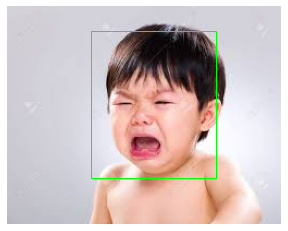

In [5]:
# face detection and emotion recognition

import os 
import io 
from google.cloud import vision 
from matplotlib import pyplot as plt 
from matplotlib import patches as pch 
import cv2
  
client = vision.ImageAnnotatorClient() 
  
file = './sad baby/우는 아기1.jpg'
with io.open(file, 'rb') as image: 
    content = image.read() 
      
image = vision.Image(content = content) 
response = client.face_detection(image = image) 
faces = response.face_annotations 
  
possibility = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 
                  'POSSIBLE', 'LIKELY', 'VERY_LIKELY') 
  
img = plt.imread(file) 
fig, ax = plt.subplots(1) 
ax.imshow(img) 
  
for face in faces: 
    print('Emotion recognition')
    print('Possibility of anger: {}'.format(possibility[face.anger_likelihood])) 
    print('Possibility of joy: {}'.format(possibility[face.joy_likelihood])) 
    print('Possibility of surprise: {}'.format(possibility[face.surprise_likelihood])) 
    print('Possibility of sorrow: {}'.format(possibility[face.sorrow_likelihood])) 
    
    vertices = ([(vertex.x, vertex.y) 
                 for vertex in face.bounding_poly.vertices]) 
  
    print('Vertices covering face: {}\n\n'.format(vertices)) 
    
    # Rectangle(xy, width, height)
    rect = pch.Rectangle(vertices[0], (vertices[1][0] - vertices[0][0]), 
                        (vertices[2][1] - vertices[0][1]), linewidth = 1, 
                                       edgecolor = (0,1,0), facecolor ='none') 
    ax.add_patch(rect) 
      
print('Confidence in Detection: {}%'.format( 
            face.detection_confidence * 100))

print(possibility[face.joy_likelihood])

plt.axis("off")
plt.show() 

# cv2로 imshow
image = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
cv.rectangle(image,(vertices[0]),(vertices[2]),(0,255,0),2)
cv2.imshow('Baby face detection using API',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ROI(검출된 얼굴 영역)를 잘라 특정 파일에 이미지 저장

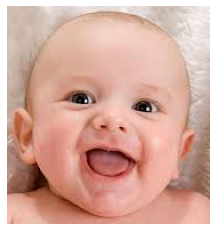

In [13]:
# roi부분만 이미지 crop

client = vision.ImageAnnotatorClient() 
fig, ax = plt.subplots(1) 
path = "./Happy baby test/"
file_list = os.listdir(path)
# print(file_list)
i = 1
for file in file_list:
    with io.open("./Happy baby test/{}".format(file), 'rb') as image: 
        content = image.read() 

    image = vision.Image(content = content) 
    response = client.face_detection(image = image) 
    faces = response.face_annotations 
    img = plt.imread("./Happy baby test/{}".format(file)) 

    for face in faces: 
        vertices = ([(vertex.x, vertex.y) 
                     for vertex in face.bounding_poly.vertices]) 

        roi = img[vertices[0][1]:vertices[3][1], vertices[0][0]:vertices[1][0]] # img[높이 범위, 너비 범위]

        plt.axis("off")
        plt.imshow(roi)
        
# roi부분만 crop한 이미지를 특정 파일에 저장
        roi_path = os.path.abspath("C:/Users/KimSeonmin/Desktop/Bright_moment/crop_image_test")
        roi_file = 'roi_crop{}.jpg'.format(i)
        fig.savefig(os.path.join(roi_path, roi_file))
        i += 1

## 영상 캡쳐 및 프레임 저장

In [20]:
import cv2

video_file = "merge video.mp4" # 동영상 파일 경로
vidcap = cv2.VideoCapture(video_file)

success,image = vidcap.read()

count = 1
num = 1
success = True

while success:
    success,image = vidcap.read()
    if (count%24 ==0):
        cv2.imwrite("frame\\%d.jpg" % num, image)
        print("saved image %d.jpg" % num)
        num += 1
  
    if cv2.waitKey(10) == 27:                    
        break
    count += 1

saved image 1.jpg
saved image 2.jpg
saved image 3.jpg
saved image 4.jpg
saved image 5.jpg
saved image 6.jpg
saved image 7.jpg
saved image 8.jpg
saved image 9.jpg
saved image 10.jpg
saved image 11.jpg
saved image 12.jpg
saved image 13.jpg
saved image 14.jpg
saved image 15.jpg
saved image 16.jpg
saved image 17.jpg
saved image 18.jpg
saved image 19.jpg
saved image 20.jpg
saved image 21.jpg
saved image 22.jpg
saved image 23.jpg
saved image 24.jpg
saved image 25.jpg
saved image 26.jpg
saved image 27.jpg
saved image 28.jpg
saved image 29.jpg
saved image 30.jpg
saved image 31.jpg
saved image 32.jpg
saved image 33.jpg
saved image 34.jpg
saved image 35.jpg
saved image 36.jpg
saved image 37.jpg
saved image 38.jpg
saved image 39.jpg
saved image 40.jpg
saved image 41.jpg
saved image 42.jpg
saved image 43.jpg
saved image 44.jpg
saved image 45.jpg
saved image 46.jpg
saved image 47.jpg
saved image 48.jpg
saved image 49.jpg
saved image 50.jpg
saved image 51.jpg
saved image 52.jpg
saved image 53.jpg
sa

## 저장된 프레임의 ROI(얼굴 영역) 저장

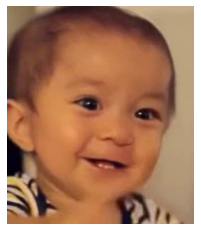

In [6]:
# roi부분만 이미지 crop

client = vision.ImageAnnotatorClient() 
fig, ax = plt.subplots(1) 
path = "./frame/"
file_list = os.listdir(path)
# print(file_list)
i = 1
for file in file_list:
    with io.open("./frame/{}".format(file), 'rb') as image: 
        content = image.read() 

    image = vision.Image(content = content) 
    response = client.face_detection(image = image) 
    faces = response.face_annotations 
    img = plt.imread("./frame/{}".format(file)) 

    for face in faces: 
        vertices = ([(vertex.x, vertex.y) 
                     for vertex in face.bounding_poly.vertices]) 

        roi = img[vertices[0][1]:vertices[3][1], vertices[0][0]:vertices[1][0]] # img[높이 범위, 너비 범위]

        plt.axis("off")
        plt.imshow(roi)
        
# roi부분만 crop한 이미지를 특정 파일에 저장
        roi_path = os.path.abspath("C:/Users/KimSeonmin/Desktop/Bright_moment/crop_image")
        roi_file = 'roi_crop{}.jpg'.format(i)
        fig.savefig(os.path.join(roi_path, roi_file))
        i += 1

## joy, sorrow 감정으로 분류된 이미지를 특정 파일에 저장

joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
sorrow
sorrow
sorrow
sorrow
joy
joy
sorrow
sorrow
sorrow
joy
joy
joy
sorrow
joy
joy


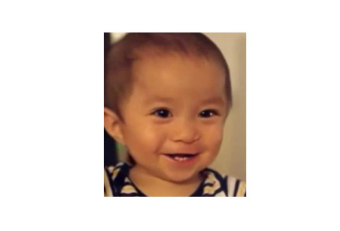

In [26]:
client = vision.ImageAnnotatorClient() 
fig, ax = plt.subplots(1) 
path = "./crop_image"
file_list = os.listdir(path)
# print(file_list)
joy_num, sorrow_num = 1, 1
for file in file_list:
    with io.open("./crop_image/{}".format(file), 'rb') as image: 
        content = image.read() 

    image = vision.Image(content = content) 
    response = client.face_detection(image = image) 
    faces = response.face_annotations 
    img = plt.imread("./crop_image/{}".format(file))  

#     print("joy: {}".format(possibility[faces[0].joy_likelihood]),end=" / ")
#     print("sorrow: {}".format(possibility[faces[0].sorrow_likelihood]))

    plt.axis("off")
    plt.imshow(img)
                   
    # joy로 분류된 이미지를 특정 파일에 저장    
    if len(faces) == 1:
        if (possibility[faces[0].joy_likelihood] == "VERY_LIKELY" 
            or possibility[faces[0].joy_likelihood]== "LIKELY"
            or possibility[faces[0].joy_likelihood]== "POSSIBLE"):
            print("joy")
            classification_path = os.path.abspath("C:/Users/KimSeonmin/Desktop/Bright_moment/joy_classification")
            joy_file = 'joy{}.jpg'.format(joy_num)
            fig.savefig(os.path.join(classification_path, joy_file))
            joy_num += 1

        # sorrow로 분류된 이미지를 특정 파일에 저장    
        if (possibility[faces[0].sorrow_likelihood] == "VERY_LIKELY" 
            or possibility[faces[0].sorrow_likelihood]== "LIKELY"
            or possibility[faces[0].sorrow_likelihood]== "POSSIBLE"):
            print("sorrow")
            classification_path = os.path.abspath("C:/Users/KimSeonmin/Desktop/Bright_moment/sorrow_classification")
            sorrow_file = 'sorrow{}.jpg'.format(sorrow_num)
            fig.savefig(os.path.join(classification_path, sorrow_file))
            sorrow_num += 1

# ax.imshow(img)